In [1]:
# General imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import tensorflow as tf
# from sklearn.preprocessing import normalize

# Neurophox imports
from neurophox.numpy import *
from neurophox.tensorflow import *
from neurophox.ml.nonlinearities import cnorm, cnormsq
from neurophox.initializers import *
from neurophox.components import *
from neurophox.helpers import *

In [2]:
class PhaseInitializer(MeshPhaseInitializer):
    """
    User-specified initialization of rectangular and triangular mesh architectures.

    Args:
        phase: Phase to initialize
        units: Input dimension, :math:`N`
    """

    def __init__(self, phase: np.ndarray, units: int):
        self.phase, self.units = phase, units
        super(PhaseInitializer, self).__init__(units, self.phase.shape[0])

    def to_np(self) -> np.ndarray:
        return self.phase.astype(NP_FLOAT)

## Investigating Neurophox

Basic unit simulation
$$ U_2(\theta, \phi) = B \cdot R(\theta) \cdot B \cdot R(\phi) = i \begin{bmatrix} e^{i \phi}\sin \frac{\theta}{2} & \cos \frac{\theta}{2} \\\\
        e^{i \phi}\cos \frac{\theta}{2} & -\sin \frac{\theta}{2} \end{bmatrix} $$
![Alt text](image.png)

In [3]:
mzi.BlochMZI(0, 0, False).matrix

array([[0.+0.j, 0.+1.j],
       [0.+1.j, 0.+0.j]])

In [27]:
input = 4
depth = 5
layer = RMNumpy(input, depth)
type(layer)

neurophox.numpy.layers.RMNumpy

Phases are stored in arrays of size `(depth, input // 2)`

We need to store half the input amount of phases as each MZI has 2 input ports and is characterised by a single pair of $(\theta, \phi)$.

In [28]:
layer.theta.T

array([[0.5808689 , 0.40803068, 0.93953515, 1.87063208, 1.46720983],
       [2.65388288, 0.        , 0.15391314, 0.        , 2.12988061]])

In [29]:
layer.phi.T

array([[4.68224897, 5.92223638, 0.62535491, 1.3717976 , 4.87874205],
       [1.02387983, 3.66936286, 0.92077258, 4.268002  , 2.62449535]])

In [32]:
layer.gamma.T

array([[1.1082804 ],
       [1.9430582 ],
       [5.02199356],
       [5.39584577]])

In [30]:
layer.phases.internal_phase_shifts

array([[ 0.29043445,  0.20401534,  0.46976758,  0.93531604,  0.73360492],
       [-0.29043445, -0.20401534, -0.46976758, -0.93531604, -0.73360492],
       [ 1.32694144,  1.57079633,  0.07695657,  1.57079633,  1.06494031],
       [-1.32694144, -1.57079633, -0.07695657, -1.57079633, -1.06494031]])

In [166]:
HaarRandomPhaseInitializer(4, 5).to_np()

array([[1.42866214, 1.93940082],
       [0.95208025, 0.        ],
       [1.34039713, 2.38866947],
       [1.21625939, 0.        ],
       [1.89075928, 1.92725722]])

In [154]:
units = 7
a = ConstantPhaseInitializer(units, units, np.pi/4).to_np() # 
b = ConstantPhaseInitializer(2*units, 1, 0).to_np()

In [167]:
MeshPhases(a, a, b).internal_phase_shifts

array([[ 0.39269908,  0.39269908,  0.39269908,  0.39269908,  0.39269908,
         0.39269908,  0.39269908],
       [-0.39269908, -0.39269908, -0.39269908, -0.39269908, -0.39269908,
        -0.39269908, -0.39269908],
       [ 0.39269908,  0.39269908,  0.39269908,  0.39269908,  0.39269908,
         0.39269908,  0.39269908],
       [-0.39269908, -0.39269908, -0.39269908, -0.39269908, -0.39269908,
        -0.39269908, -0.39269908],
       [ 0.39269908,  0.39269908,  0.39269908,  0.39269908,  0.39269908,
         0.39269908,  0.39269908],
       [-0.39269908, -0.39269908, -0.39269908, -0.39269908, -0.39269908,
        -0.39269908, -0.39269908],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [33]:
nplayer = RMNumpy(21, theta_init_name="random_theta")

In [34]:
inp = np.eye(21)[10]

In [35]:
abs(nplayer.propagate(inp)).squeeze()

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.85472787e-01, 1.69833408e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.67101857e-01, 1.89395384e-01, 6.77048837e-02,
        1.5575

Text(0.5, 1.0, 'Propagation for Haar random $\\theta_{n\\ell}$')

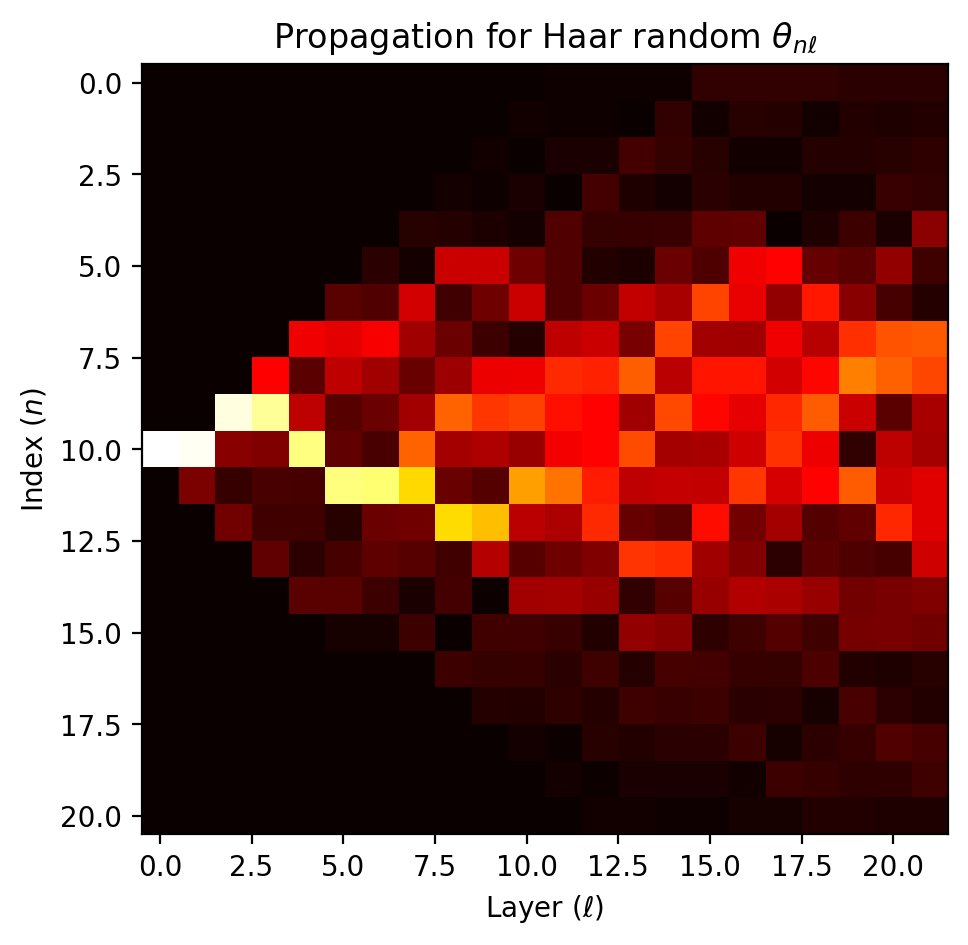

In [36]:
plt.figure(dpi=200, figsize=(10, 5))
plt.imshow(abs(nplayer.propagate(inp)).squeeze().T, cmap='hot')
plt.ylabel("Index ($n$)")
plt.xlabel("Layer ($\ell$)")
plt.title('Propagation for Haar random $\\theta_{n\ell}$')

## Effect of phase on inference

In [ ]:
def generate_network(N, N_classes=10, L=1, theta_init_name='haar_rect', phi_init_name='random_phi', alpha=0.1, g=0.05*np.pi, phi_b=1*np.pi):
    """ Creates L layer ONN

    Args:
        N (int): Size of the input layer
        N_classes (int, optional): _description_. Defaults to 10.
        L (int, optional): _description_. Defaults to 1.
        theta_init_name (str, optional): _description_. Defaults to 'haar_rect'.
        phi_init_name (str, optional): _description_. Defaults to 'random_phi'.

    Returns:
        Sequential: _description_
    """
    layers=[]
    
    for _ in range(L):
        layers.append(RM(N, theta_init_name=theta_init_name, phi_init_name=phi_init_name))
        # layers.append(EOIntensityModulation(N, alpha, g, phi_b))
    
    layers.append(Activation(cnormsq))
    layers.append(Lambda(lambda x: tf.math.real(x[:, :N_classes])))
    layers.append(Lambda(lambda x: tf.math.l2_normalize(x, axis=-1)))
    # layers.append(tf.keras.layers.Softmax(axis=-1))

    return Sequential(layers)

In [47]:

bruh = RM(3).theta
bruh

<tf.Variable 'theta:0' shape=(3, 1) dtype=float32, numpy=
array([[1.8426768 ],
       [0.60399073],
       [1.2933435 ]], dtype=float32)>

In [45]:
hi = RM(3)
hi.theta

<tf.Variable 'theta:0' shape=(3, 1) dtype=float32, numpy=
array([[2.370154  ],
       [0.27833036],
       [1.4279652 ]], dtype=float32)>

In [48]:
hi.theta = bruh

In [49]:
hi.theta

<tf.Variable 'theta:0' shape=(3, 1) dtype=float32, numpy=
array([[1.8426768 ],
       [0.60399073],
       [1.2933435 ]], dtype=float32)>